In [1]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 247.5 kB/s eta 0:00:00
  Using cached Pillow-9.5.0-cp37-cp37m-win_amd64.whl (2.5 MB)
  Using cached numpy-1.21.6-cp37-cp37m-win_amd64.whl (14.0 MB)
     ------------------------------------ 247.7/247.7 kB 323.1 kB/s eta 0:00:00
     -------------------------------------- 48.9/48.9 kB 274.2 kB/s eta 0:00:00
     -------------------------------------- 55.8/55.8 kB 171.9 kB/s eta 0:00:00
     ------------------------------------ 103.1/103.1 kB 106.2 kB/s eta 0:00:00
     ------------------------------------ 965.4/965.4 kB 224.7 kB/s eta 0:00:00


In [2]:
!pip install torchvision 

     ---------------------------------------- 1.1/1.1 MB 160.4 kB/s eta 0:00:00
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ------------------------------------ 162.6/162.6 MB 560.5 kB/s eta 0:00:00
     ------------------------------------ 123.9/123.9 kB 382.7 kB/s eta 0:00:00
     -------------------------------------- 94.7/94.7 kB 538.2 kB/s eta 0:00:00
     -------------------------------------- 61.5/61.5 kB 657.7 kB/s eta 0:00:00


In [5]:
import cv2
import matplotlib.pyplot as plt
import os
from utils import *
from darknet import Darknet

In [6]:
# Set the location and name of the cfg file
cfg_file = '../data/cfg/crop_weed.cfg'

# Set the location and name of the pre-trained weights file
weight_file = '../data/weights/' + 'crop_weed_detection.weights' # add weights file name here if you have your own

# Set the location and name of the object classes file
namesfile = '../data/names/obj.names'

# Load the network architecture
m = Darknet(cfg_file)

# Load the pre-trained weights
m.load_weights(weight_file)

# Load the COCO object classes
class_names = load_class_names(namesfile)

# Taking a Look at The Neural Network

Now that the neural network has been setup, we can see what it looks like. We can print the network using the `.print_network()` function.

In [7]:
# Print the neural network used in YOLOv3
m.print_network()

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   512 x 512 x   3   ->   512 x 512 x  32
    1 conv     64  3 x 3 / 2   512 x 512 x  32   ->   256 x 256 x  64
    2 conv     32  1 x 1 / 1   256 x 256 x  64   ->   256 x 256 x  32
    3 conv     64  3 x 3 / 1   256 x 256 x  32   ->   256 x 256 x  64
    4 shortcut 1
    5 conv    128  3 x 3 / 2   256 x 256 x  64   ->   128 x 128 x 128
    6 conv     64  1 x 1 / 1   128 x 128 x 128   ->   128 x 128 x  64
    7 conv    128  3 x 3 / 1   128 x 128 x  64   ->   128 x 128 x 128
    8 shortcut 5
    9 conv     64  1 x 1 / 1   128 x 128 x 128   ->   128 x 128 x  64
   10 conv    128  3 x 3 / 1   128 x 128 x  64   ->   128 x 128 x 128
   11 shortcut 8
   12 conv    256  3 x 3 / 2   128 x 128 x 128   ->    64 x  64 x 256
   13 conv    128  1 x 1 / 1    64 x  64 x 256   ->    64 x  64 x 128
   14 conv    256  3 x 3 / 1    64 x  64 x 128   ->    64 x  64 x 256
   15 shortcut 12
   16 conv    128  1 x 1



# Visualizing some images



In [8]:
images = os.listdir('../data/images/')
plt.figure(figsize=(24,15))
for i,name in enumerate(images):
   
    
    img = plt.imread('../data/images/'+name)
    
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title(name[:-5])
    plt.axis('off')
    
plt.show()

PermissionError: [Errno 13] Permission denied: '../data/images/.ipynb_checkpoints'

<Figure size 1728x1080 with 0 Axes>

# Object Detection



In [9]:
def detection(path,iou_thresh=0.4,nms_thresh=0.6):

    '''
    input path of any image will return detection in given image
    '''    
    # Set the default figure size
    plt.rcParams['figure.figsize'] = [24.0, 14.0]

    # Load the image
    img = cv2.imread(path)

    # Convert the image to RGB
    original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # We resize the image to the input width and height of the first layer of the network.    
    resized_image = cv2.resize(original_image, (m.width, m.height))

    # Set the IOU threshold. Default value is 0.4
    iou_thresh = iou_thresh

    # Set the NMS threshold. Default value is 0.6
    nms_thresh = nms_thresh

    # Detect objects in the image
    boxes = detect_objects(m, resized_image, iou_thresh, nms_thresh)

    # Print the objects found and the confidence level
    print_objects(boxes, class_names)

    #Plot the image with bounding boxes and corresponding object class labels
    plot_boxes(original_image, boxes, class_names, plot_labels = True)

# Use detection function with any image



It took 2.408 seconds to detect the objects in the image.

Number of Objects Detected: 1 

Objects Found and Confidence Level:

1. crop: 0.999999


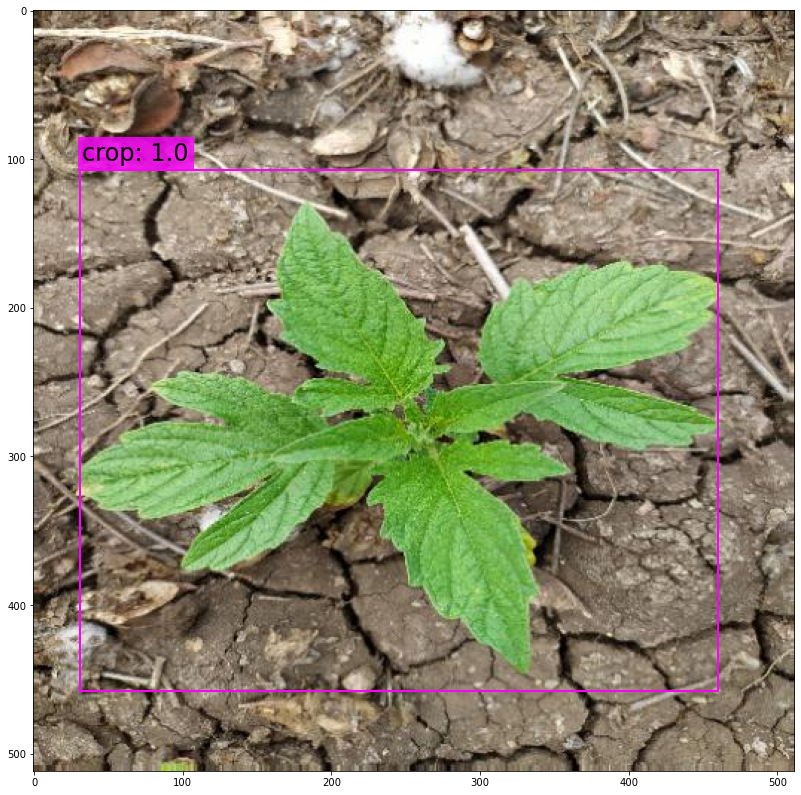

In [10]:
detection('../data/images/agri_0_3.jpeg')